In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from fal import FalDbt

In [9]:
faldbt = FalDbt(".", ".")

# Print models and statuses
models = faldbt.list_models()
for model in models:
  print(f"model: {model.name}, status: {model.status}")

# Have a look at customer_orders model
customer_orders_df = faldbt.ref("customer_orders")
customer_orders_df.head()

16:40:45  Found 3 models, 0 tests, 0 snapshots, 0 analyses, 291 macros, 0 operations, 2 seed files, 0 sources, 0 exposures, 0 metrics
16:40:45 [fal]: [WARNING]: Could not read dbt sources artifact
model: customers, status: success
model: orders, status: success
model: customer_orders, status: success


,order_id,customer_id,order_date,product_id,quantity,total_amount,returned,customer_join_date,average_order_value,total_orders,days_since_last_order,return_rate,customer_segment
0,1,230,2022-07-29,51,5,182.580296,0,2021-02-16,36.516059,32,48,0.558387,loyal
1,2,846,2022-12-02,56,1,66.528450,0,2021-12-24,66.528450,30,115,0.000000,new
2,4,411,2022-08-26,9,5,494.884104,1,2020-10-03,98.976821,2,89,0.847675,infrequent
3,8,974,2022-12-09,92,4,293.453103,0,2021-08-14,73.363276,32,165,0.297927,loyal
4,9,97,2022-06-22,6,3,288.121363,0,2020-10-23,96.040454,4,97,0.462267,loyal


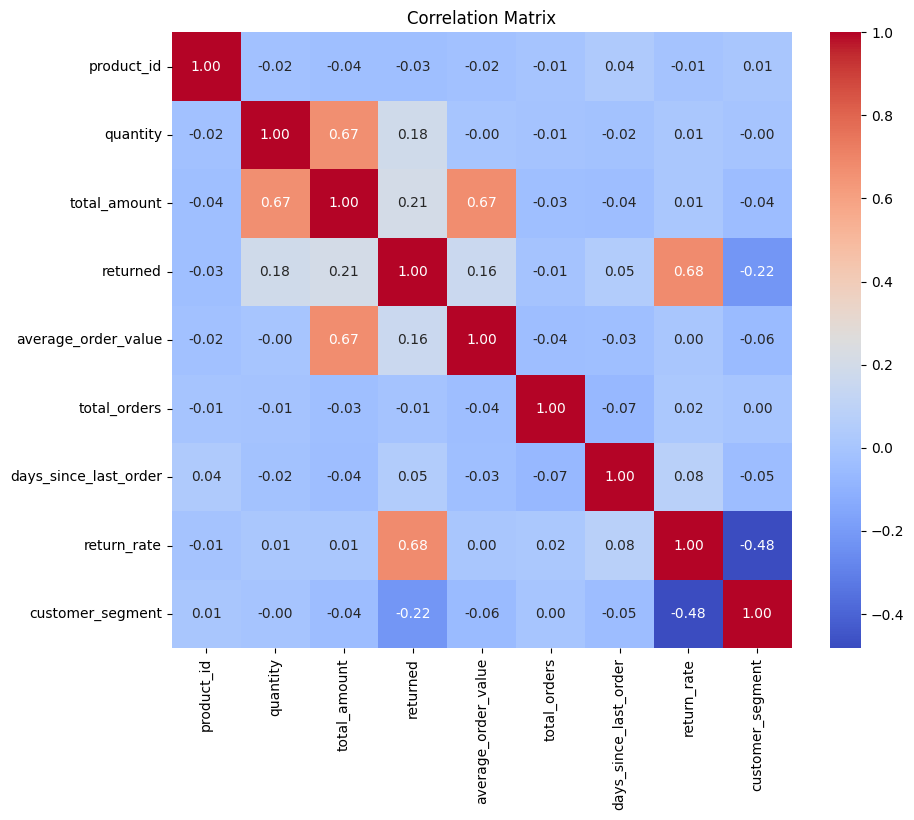

In [12]:
data = customer_orders_df

# Encode the 'CustomerSegment' categorical variable
data['customer_segment'] = pd.Categorical(data['customer_segment']).codes

# Exclude ID columns
columns_to_exclude = ['customer_id', 'order_id']
data_filtered = data.drop(columns=columns_to_exclude)

# Compute the correlation matrix
corr_matrix = data_filtered.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Encode the 'CustomerSegment' categorical variable
data['customer_segment'] = pd.Categorical(data['customer_segment']).codes

# Define the label
y = data['returned']

# Define feature sets with different combinations of features
feature_sets = [
    ['quantity', 'total_amount'],
    ['quantity', 'total_amount', 'average_order_value'],
    ['quantity', 'total_amount', 'return_rate'],
    ['quantity', 'total_amount', 'customer_segment'],
    ['quantity', 'total_amount', 'average_order_value', 'return_rate', 'customer_segment']
]

for features in feature_sets:
    # Select features for this iteration
    X = data[features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, F1-score, confusion matrix, and ROC-AUC score
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print the results
    print(f"Features: {features}")
    print(f"Accuracy: {accuracy}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Classification report:\n{report}")
    print(f"Confusion matrix:\n{cm}\n")

Features: ['quantity', 'total_amount']
Accuracy: 0.7813990461049285
ROC-AUC: 0.4984787018255578
Classification report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       986
           1       0.00      0.00      0.00       272

    accuracy                           0.78      1258
   macro avg       0.39      0.50      0.44      1258
weighted avg       0.61      0.78      0.69      1258

Confusion matrix:
[[983   3]
 [272   0]]

Features: ['quantity', 'total_amount', 'average_order_value']
Accuracy: 0.7837837837837838
ROC-AUC: 0.5
Classification report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       986
           1       0.00      0.00      0.00       272

    accuracy                           0.78      1258
   macro avg       0.39      0.50      0.44      1258
weighted avg       0.61      0.78      0.69      1258

Confusion matrix:
[[986   0]
 [272   0]]

Features: ['quan